# Анализ популярности компьютерных игр

*Зачетный проект Яндекс Практикума по блоку тем «Python», «Предобработка данных», «Исследовательский анализ», «Статистический анализ»*

**Цель**: определить основу для рекламной кампании для интернет-магазина на 2017 год.

Данные: полученные из открытых источников исторические данные до 2016 года — продажи игр, оценки пользователей и экспертов, жанры и платформы. 

Заказчик: рекламный отдел.

**Задачи:**
- EDA: выявить закономерности, позволяющие определить потенциально популярный продукт,
- описать пользовательские портреты по регионам,
- статистический анализ: гипотеза о связи пользовательских рейтингов и платформ,
- статистический анализ: гипотеза о связи пользовательских рейтингов и жанров.

## Оглавление
1. Обзор данных
    * 1.1 пропуски
    * 1.2 типы данных
    * 1.3 проверка дубликатов
    * 1.4 добавление столбца
    * 1.5 вывод
2. EDA
    * 2.1 актуальный период
    * 2.2 популярность платформ
    * 2.3 влияние отзывов на продажи
    * 2.4 распределение игр по жанрам
    * 2.5 вывод
3. Пользовательские портреты регионов
    * 3.1 платформы
    * 3.2 жанры
    * 3.3 рейтинг ESRB
    * 3.4 вывод
4. Статистический анализ
    * 4.1 платформы XOne и PC
    * 4.2 жанры Action и Sports
    * 4.3 вывод
5. Итог

## 1. Обзор данных

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from scipy import stats as st

pd.set_option('mode.chained_assignment', None)

Откроем файл и выведем общую информацию.

In [2]:
data = pd.read_csv('games.csv')
    
display(data.head())
data.info()

Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Есть информация, которая требует обработки: пропуски, типы данных в столбцах.

### 1.1 пропуски

Приведем названия столбцов к нижнему регистру.

In [3]:
data.columns = data.columns.str.lower()

Выведем данные о пропусках.

In [4]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Оценим доли пропусков в каждом случае.

In [5]:
#pd.DataFrame(data.isna().mean()*100).style.background_gradient('coolwarm')

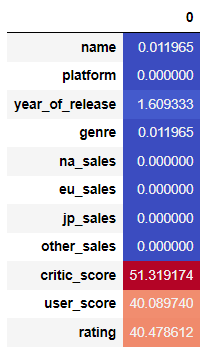

Доля пропусков в столбцах `name`, `year_of_release` и `genre` составляет менее 2% суммарно, их можно удалить.

In [6]:
dt = data[~(data['name'].isna()) &
          ~(data['year_of_release'].isna()) &
          ~(data['genre'].isna())]

В столбце `rating` заменим пропуски на *unknown*.

In [7]:
dt['rating'] = dt['rating'].fillna('unknown')

print('Виды рейтингов:', dt['rating'].unique())

Виды рейтингов: ['E' 'unknown' 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


Пропуски в столбцах `critic_score` и `user_score` оставляем без изменений.

### 1.2 типы данных

В столбце `user_score` тип данных *object*: проверим значения этого столбца.

In [8]:
dt['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Помимо *nan* в столбце встречается значение *tbd* — to be determined, что означает, что оценка пользователя об игре есть, но на момент выгрузки датасета не была подтверждена платформой. Оценим количество таких значений.

In [9]:
tdb = dt.loc[dt['user_score'] == 'tbd']['user_score'].count()

print('Количество неподтвержденных оценок:', tdb)
print('Доля неподтвержденных оценок:', round(tdb / len(dt), 2))

Количество неподтвержденных оценок: 2376
Доля неподтвержденных оценок: 0.14


Поскольку *tbd* фактически означает пропуск, примем решение заменить значение на nan.

In [10]:
dt.loc[dt['user_score'] == 'tbd', 'user_score'] = np.nan

Преобразуем типы данных в столбцах с годом выпуска и пользовательским рейтингом.

In [11]:
dt = dt.astype({'year_of_release': 'int', 'user_score': 'float'})

В столбце `critic_score`, cудя по шкале (100 баллов) и первым строкам датасета, вполне могут быть только целочисленные значения.

In [12]:
dt['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

Для удобства приведем данные столбца к целочисленному типу.

In [13]:
dt.loc[~dt['critic_score'].isna()] = dt.loc[~dt['critic_score'].isna()].astype({'critic_score': 'int'})

### 1.3 проверка дубликатов

Проверим получившийся датасет на наличие явных дубликатов.

In [14]:
dt.duplicated().sum()

0

### 1.4 добавление столбца

Создадим новый столбец `total_sales`, в котором суммируются продажи во всех регионах.

In [15]:
dt['total_sales'] = dt['na_sales'] + dt['eu_sales'] + dt['jp_sales'] + dt['other_sales']

### 1.5 вывод

Выведем информацию об обработанном датасете.

In [16]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB


Данные сохранены в переменной. Удалены пропуски в трех столбцах (менее 2% суммарно). Изменены типы данных. Явные дубликаты не обнаружены.

## 2. EDA

### 2.1 актуальный период

Посмотрим, как распределяется количество игр, выпущенных в разные годы, и объем продаж в зависимости от года выпуска игры.

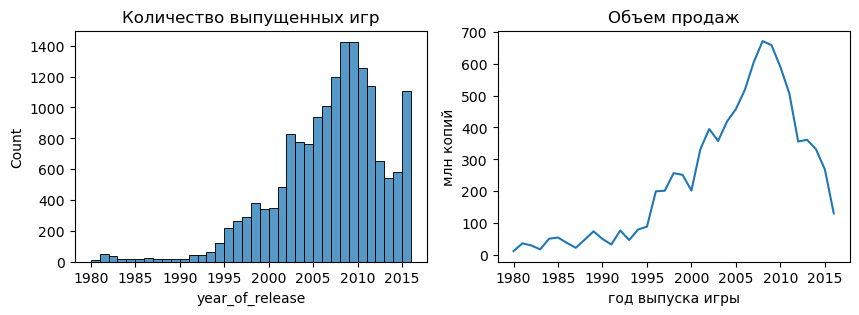

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))

sn.histplot(dt['year_of_release'], binwidth=1, ax=ax[0]);
ax[0].title.set_text('Количество выпущенных игр')

(dt
 .groupby('year_of_release').sum().sort_values('year_of_release')
 .plot(y='total_sales', 
       title='Объем продаж', 
       xlabel='год выпуска игры', 
       ylabel='млн копий', 
       legend=False, ax=ax[1])
);

Графики показывают, что рост индустрии начинается примерно в 1995 году. Пик приходится на вторую половину 2000-х.

Выведем платформы с наибольшим суммарным объемом продаж за весь период.

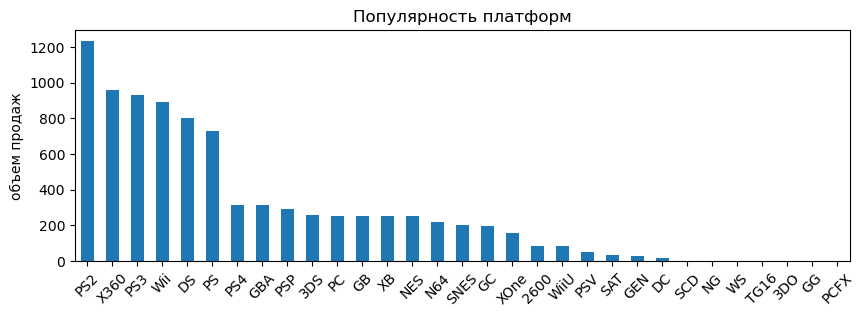

In [18]:
(dt
 .groupby('platform').sum().sort_values('total_sales', ascending=False)
 .plot(kind='bar', y='total_sales',
       title='Популярность платформ',
       ylabel='объем продаж',
       xlabel='', rot=45,
       figsize=(10, 3), legend=False)
);

Для 6 платформ — лидеров продаж посмотрим на распределение продаж в зависимости от года выпуска игры .

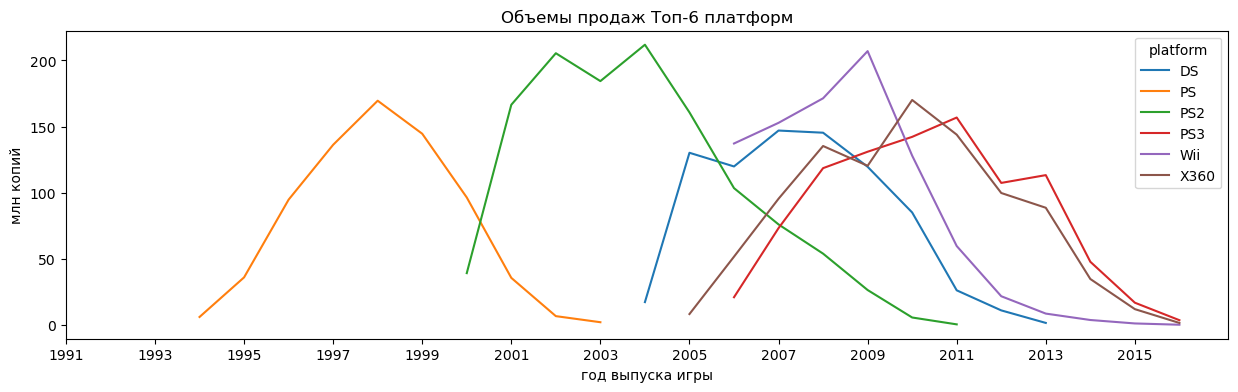

In [19]:
top6 = list(dt.groupby('platform').sum().sort_values('total_sales', ascending=False)['total_sales'].head(6).index)

(dt
 .query('platform in @top6 and year_of_release > 1990')
 .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
 .reset_index()
 .plot(x='year_of_release', figsize=(15, 4),
       title='Объемы продаж Топ-6 платформ',
       xlabel='год выпуска игры',
       xticks=(range(1991, 2017, 2)),
       ylabel='млн копий')
);

Средний жизненный цикл платформы около 10 лет, значит для анализа необходимо использовать данные не старше половины этого срока, иначе мы учтем уже не актуальную информацию, в которой затеряются платформы с растущей популярностью. 

Две последних платформы-лидера остаются популярными вплоть до 2013 года, поэтому нужно отбросить весь этот период, чтобы их высокие продажи не влияли на анализ. 2016 год также не будем принимать в расчет, чтобы очевидно не полные данные за последний год не исказили общую картину.

Итак, актуальный для анализа период — 2014-2015 годы.

In [20]:
cur = dt.query('2016 > year_of_release > 2013')

### 2.2 популярность платформ

Выведем популярные в актуальный период платформы – оценка по суммарным продажам.

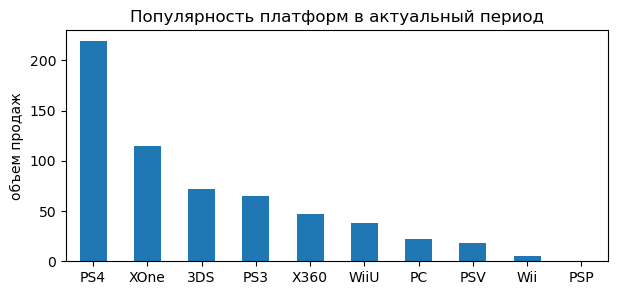

In [21]:
(cur
 .groupby('platform').sum().sort_values('total_sales', ascending=False)
 .plot(kind='bar', y='total_sales',
       title='Популярность платформ в актуальный период',
       ylabel='объем продаж',
       xlabel='', rot=0,
       figsize=(7, 3), legend=False)
);

Исключим платформы с заканчивающимся жизненным циклом и посмотрим на распределение продаж за последнее десятилетие, чтобы нагляднее увидеть появление новых платформ и развитие их популярности.

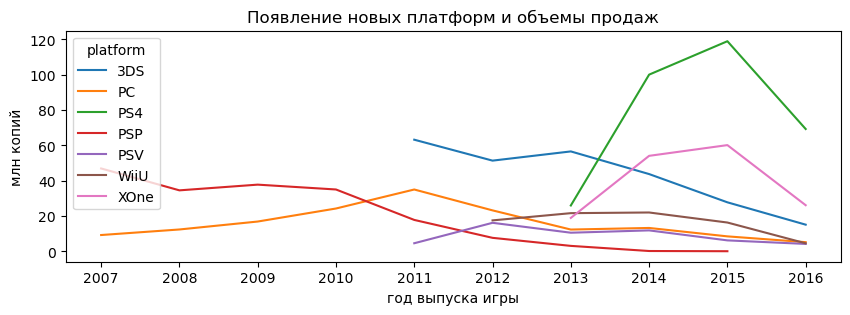

In [22]:
current = list(dt.query('year_of_release > 2011')['platform'].unique())

(dt
 .query('platform in @current and not platform in @top6 and year_of_release > 2006')
 .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
 .reset_index()
 .plot(x='year_of_release', figsize=(10, 3),
       title='Появление новых платформ и объемы продаж',
       xlabel='год выпуска игры',
       xticks=(range(2007, 2017)),
       ylabel='млн копий')
);

Суммарные продажи выделяют следующие категории платформ в актуальном периоде:
1. Новые платформы с растущей популярностью — PS4 и XOne.
2. Новые платформы с неочевидными перспективами — 3DS, WiiU и PSV.
3. Устаревающие популярные платформы — PS3, X360, Wii.
4. Старые платформы c сектором преданных пользователей — PC и PSP. 

Построим графики разброса, чтобы оценить медианные продажи игр за актуальный период в разбивке по платформам.

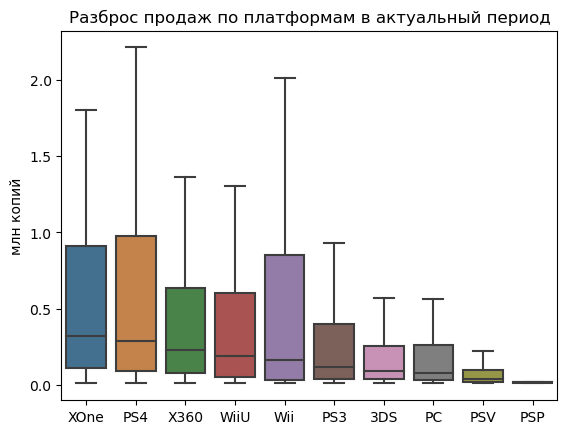

In [23]:
order = list(cur.groupby('platform').median().sort_values('total_sales', ascending=False).index)

ax = sn.boxplot(data=cur, x='platform', y='total_sales', order=order, showfliers=False, saturation=0.5);

plt.rcParams['figure.figsize'] = (15, 4)
ax.set(xlabel='', ylabel='млн копий')
ax.set_title('Разброс продаж по платформам в актуальный период');

По медианам продаж также лидируют XOne и PS4.

### 2.3 влияние отзывов на продажи

Построим графики корреляции отзывов пользователей и критиков с продажами на популярных платформах.

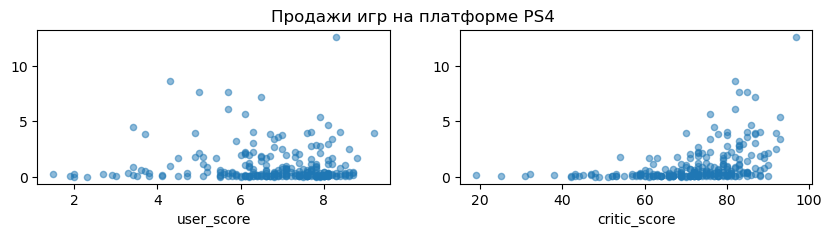

Коэффициент корелляции продаж: 
 c отзывами пользователей: -0.03 
 с отзывами критиков: 0.41


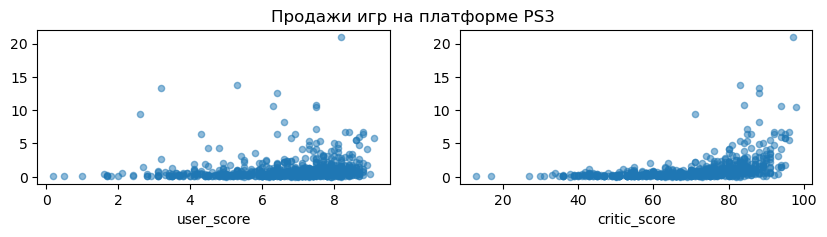

Коэффициент корелляции продаж: 
 c отзывами пользователей: 0.13 
 с отзывами критиков: 0.43


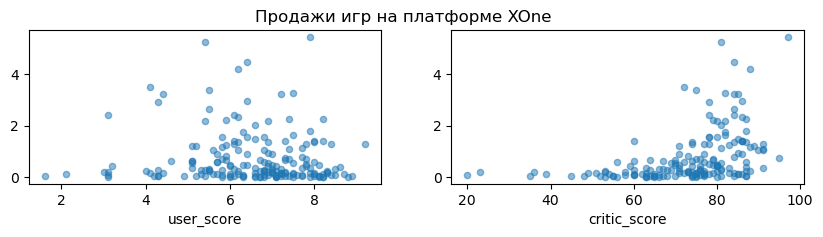

Коэффициент корелляции продаж: 
 c отзывами пользователей: -0.07 
 с отзывами критиков: 0.42


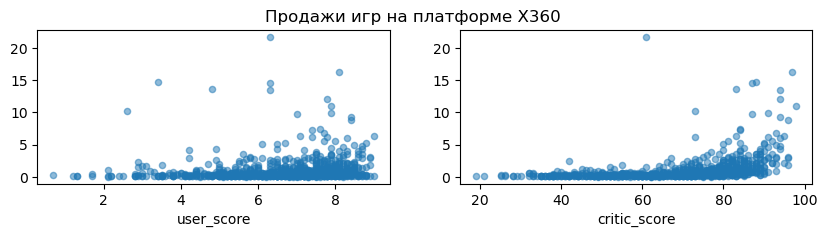

Коэффициент корелляции продаж: 
 c отзывами пользователей: 0.11 
 с отзывами критиков: 0.39


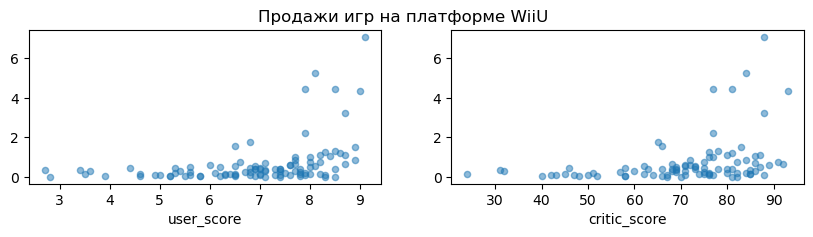

Коэффициент корелляции продаж: 
 c отзывами пользователей: 0.4 
 с отзывами критиков: 0.35


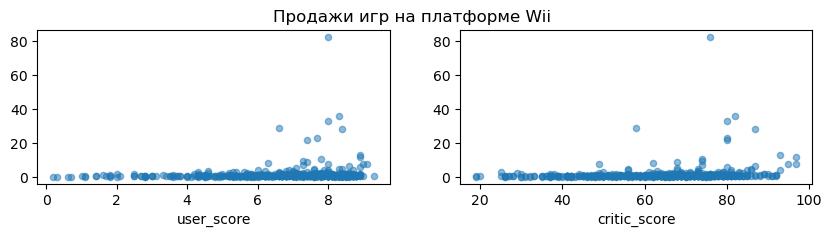

Коэффициент корелляции продаж: 
 c отзывами пользователей: 0.11 
 с отзывами критиков: 0.18


In [24]:
popular = ['PS4', 'PS3', 'XOne', 'X360', 'WiiU', 'Wii']
features = ['user_score', 'critic_score']

for item in popular:
    fig, ax = plt.subplots(1, 2, figsize=(10, 2))
    fig.suptitle(f'Продажи игр на платформе {item}')

    plt_data = dt.query('platform == @item')
    
    for i in range(len(features)):
        plt_data.plot(kind='scatter', x=features[i], y='total_sales', alpha=0.5, ax=ax[i],
                      xlabel=features[i],
                      ylabel='');

    corr_user = plt_data['total_sales'].corr(plt_data['user_score'])
    corr_critic = plt_data['total_sales'].corr(plt_data['critic_score'])

    plt.show()
    print('Коэффициент корелляции продаж:', '\n',
          'c отзывами пользователей:', round(corr_user, 2), '\n',
          'с отзывами критиков:', round(corr_critic, 2)
         )

На платформах PS4 и PS3, XOne и X360 показатели примерно одинаковые: 
   - корелляции между отзывами пользователей и продажами нет, 
   - корелляция между отзывами критиков и продажами слабая — в пределах 0,39–0,43.

На платформах WiiU и Wii другая картина: 
   - WiiU — в обоих случаях есть слабая корелляция (0,35 и 0,40),
   - Wii — нет корелляции в обоих случаях.

### 2.4 распределение игр по жанрам

Построим графики популярности разных компьютерных игр за весь период и за текущий период — оценка по медиане.

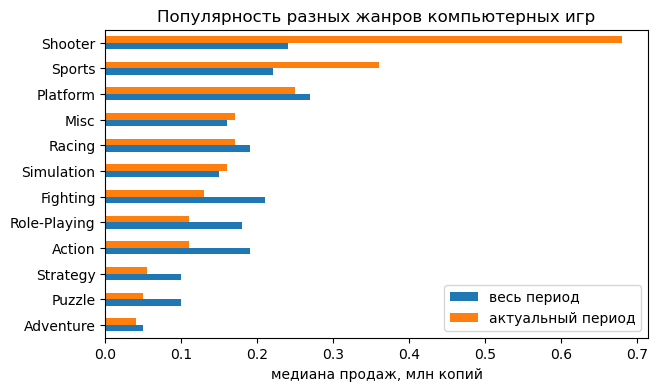

In [25]:
genre = dt.groupby('genre').median()['total_sales'].reset_index()
genre['current_sales'] = cur.groupby('genre').median().reset_index()['total_sales']

genre = genre.sort_values(by='current_sales')

genre.plot(kind='barh', x='genre', xlabel='', figsize=(7, 4),
           title='Популярность разных жанров компьютерных игр',
           );
plt.legend(('весь период', 'актуальный период'))
plt.xlabel('медиана продаж, млн копий');

По медианам продаж выделяется жанр — абсолютный лидер — *Shooter*:
   - более, чем в два раза опережающий второй по популярности жанр,
   - в два раза популярнее за актуальный период, чем за весь период.

Другие популярные в актуальный период жанры: *Sports*, *Platform*, *Misc*, *Racing* и *Simulation*. При этом нужно отметить, что жанр *Sports* — тоже значительно вырос в популярности. 

Среди жанров, заметно теряющих популярность, нужно отметить *Fighting*, *Role-Playing* и *Action*.

### 2.5 вывод

1. Актуальный для анализа прибыльности период — 2014—2015 годы. Средний жизненный цикл платформы — около 10 лет. При определении границ актуального периода нужно учитывать фактор снижения популярности стареющих платформ с большими продажами.


2. Потенциально прибыльные платформы по степени значимости:
    - PS4 и XOne  — новые платформы, быстро набирающие объемы продаж и с хорошими медианами,
    - WiiU — новая платформа с хорошей медианой продаж,
    - X360 и Wii — стареющие платформы с по-прежнему хорошими объемами и медианами продаж.
    - 3DS — новая платформа со средне-хорошими объемами и медианой продаж.


3. Влияние отзывов на продажи.   
    а) На платформах PS4 и PS3, XOne и X360:
        - оценки пользователей не влияют на продажи компьютерных игр,
        - между оценками критиков и продажами есть слабая корелляция.   
    б) На платформах Wii и WiiU:
        - WiiU — в обоих случаях есть слабая корелляция,
        - Wii — нет корелляции в обоих случаях.


4. Популярность жанров:
    - абсолютный лидер — Shooter, показывает рост более, чем в 2 раза по сравнению с данными за весь период, 
    - второе место — Sports, и он также показывает значительный рост,
    - другие популярные жанры — Platform, Misc, Racing и Simulation,
    - Fighting, Role-Playing и Action — заметное снижение популярности.

## 3. Пользовательские портреты регионов

### 3.1 платформы

Оценим популярность платформ в разных регионах на основе суммарных продаж.

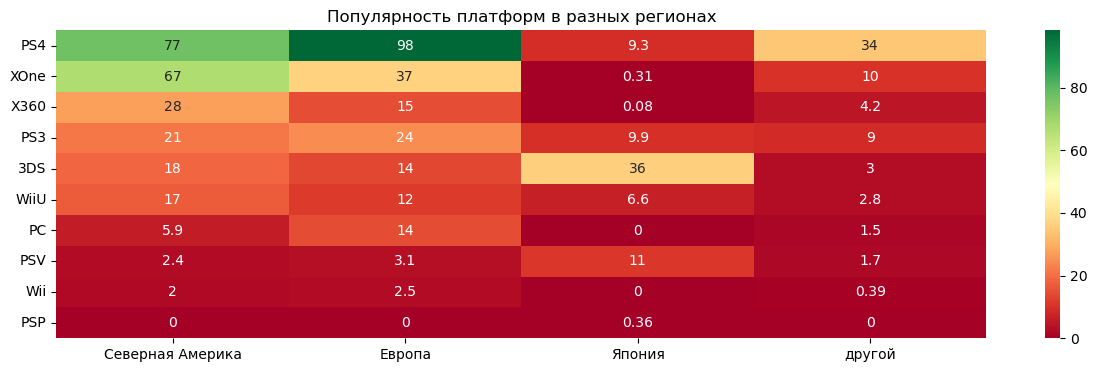

In [26]:
reg_platform = (cur.groupby('platform').sum()[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']]
                .sort_values(by='na_sales', ascending=False))

ax = sn.heatmap(reg_platform, annot=True, cmap='RdYlGn',
                xticklabels=['Северная Америка', 'Европа', 'Япония', 'другой']);

ax.set(xlabel='', ylabel='')
ax.set_title('Популярность платформ в разных регионах')
plt.setp(ax.get_yticklabels(), rotation=0);

Рейтинги популярности платформ для разных регионов отличаются.
- в Северной Америке и Европе лидируют две новые платформы PS4 и XOne, 
- при этом в Северной Америке разница между платформами-лидерами не столь велика, а в Европе PS4 популярнее XOne более чем в 2 раза,
- из стареющих платформ в Северной Америке стоит учесть X360, в Европе — PS3,
- в Японии свой лидер — 3DS, который также при этом заметно присутствует на рынке в Северной Америке и Европе (5-е место в обоих случаях), 
- новую платформу PSV для рынка Японии тоже нужно учитывать.

### 3.2 жанры

Таким же образом по суммарным продажам оценим популярность жанров по регионам.

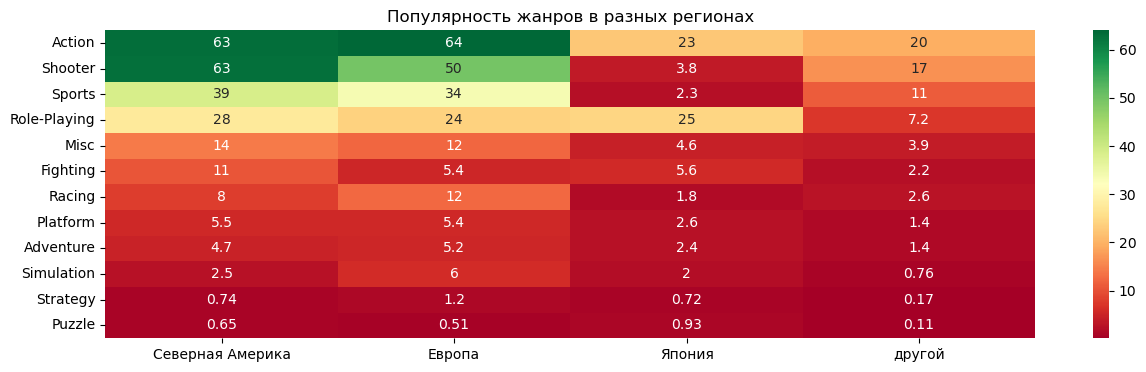

In [27]:
reg_genres = (cur.groupby('genre').sum()[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']]
                 .sort_values(by='na_sales', ascending=False))

ax = sn.heatmap(reg_genres, annot=True, cmap='RdYlGn',
                xticklabels=['Северная Америка', 'Европа', 'Япония', 'другой']);

ax.set(xlabel='', ylabel='')
ax.set_title('Популярность жанров в разных регионах')
plt.setp(ax.get_yticklabels(), rotation=0);

В предпочтениях по жанрам в регионах больше сходства, чем в предпочтениях по платформам:
- первая пятерка в Северной Америке и Европе практически совпадают, 
- жанры-лидеры Японии — Role-Playing и Action — входят в ту же пятерку,
- дополнительно для Европы можно учесть Racing, для Японии — Fighting.

### 3.3 рейтинг ESRB

Оценим влияние рейтинга ESRB на продажи в различных регионах. Для удобства визуализации заменим в столбце рейтинга сокращения на полные слова.

In [28]:
list(sorted(cur['rating'].unique()))

['E', 'E10+', 'M', 'T', 'unknown']

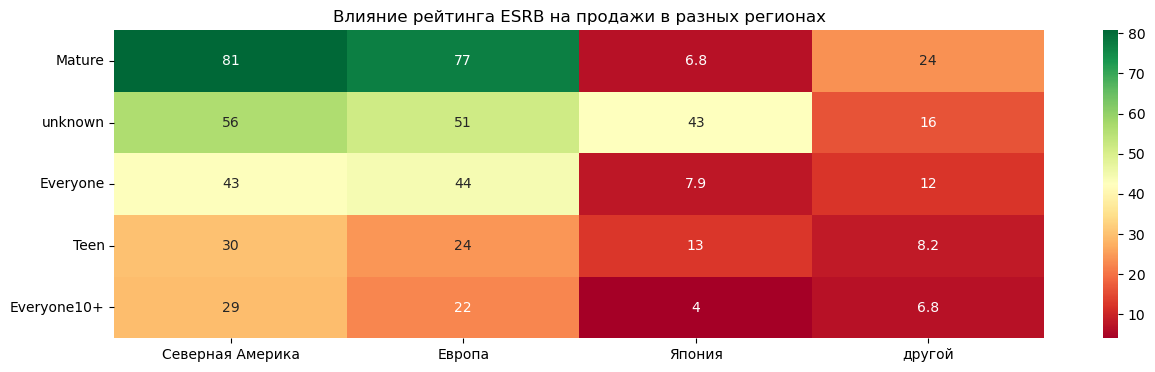

In [29]:
for x, y in ('E', 'Everyone'), ('M', 'Mature'), ('T','Teen'):
    cur['rating'] = cur['rating'].str.replace(x, y)

reg_rating = (cur.groupby('rating').sum()[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']]
                 .sort_values(by='na_sales', ascending=False))

ax = sn.heatmap(reg_rating, annot=True, cmap='RdYlGn',
                xticklabels=['Северная Америка', 'Европа', 'Япония', 'другой']);

ax.set(xlabel='', ylabel='')
ax.set_title('Влияние рейтинга ESRB на продажи в разных регионах')
plt.setp(ax.get_yticklabels(), rotation=0);

В Северной Америке и Европе картина продаж в соответствии с рейтингом полностью совпадает. Лидеры — «для взрослых», «для всех 10+», «для всех» — что скорее указывает на взрослую аудиторию. В Японии лидируют продажи игр для подростков и игры с неизвестным рейтингом.

### 3.4 вывод

1. По платформам поведение разных регионов очень сильно отличается.
- в Северной Америке и Европе лидируют две новые платформы PS4 и XOne, 
- при этом в Европе PS4 популярнее более чем в 2 раза,
- в Японии свой лидер — 3DS.

2. В отношении жанров регионы проявляют больше сходства, чем в отношении платформ, но различия есть и здесь.  
- первая пятерка в Северной Америке и Европе: Action, Shooter, Sports, Role-Playing, Misc, 
- Role-Playing и Action — это также жанры-лидеры с отрывом в Японии,
- дополнительно для Европы можно учесть Racing, для Японии — Fighting.

3. В Северной Америке и Европе картина продаж в соответствии с рейтингом полностью совпадает. Лидеры — «для взрослых», «для всех 10+», «для всех» — что скорее указывает на взрослую аудиторию. В Японии лидируют продажи игр для подростков и игры с неизвестным рейтингом, что, возможно, указывает на существование в Японии другой системы рейтинга.

## 4. Статистический анализ

### 4.1 платформы XOne и PC

Проверим гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковы. 

Сформулируем гипотезы:
- нулевая H — средние пользовательские рейтинги платформ Xbox One и PC одинаковы,
- альтернативная H — рейтинги не одинаковы.

Для сравнения средних двух генеральных совокупностей проведем статистический тест.

Зададим пороговое значение alpha — 0,01. 

Зададим в параметре теста неравную дисперсию. Хотя обе выборки достаточно велики по размеру, предположим, что параметры этих групп могут отличаться. Платформа PC существует давно и сохраняет узкий сегмент преданных пользователей, XOne — новая быстро растущая платформа. Поведение пользователей этих платформ может быть разным.

In [30]:
XOne = cur.query('platform == "XOne" and user_score >= 0')['user_score']
PC = cur.query('platform == "PC" and user_score >= 0')['user_score']

alpha = 0.01

result = st.ttest_ind(XOne, PC, equal_var=False)

print('p-значение:', result.pvalue)
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение: 0.2064150169331124
Не отвергаем нулевую гипотезу


Гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковы, отвергнуть не получилось.

### 4.2 жанры Action и Sports

Проверим гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные.

Сформулируем гипотезы:
- нулевая H — средние пользовательские рейтинги жанров Action и Sports одинаковы,
- альтернативная H — рейтинги не одинаковы.

Так же проведем статистический тест о равенстве средних двух генеральных совокупностей.

Пороговое значение alpha возьмем прежнее — 0,01.

Так же зададим в параметре теста неравную дисперсию, вновь предполагая, что параметры и этих групп могут отличаться. Жанр Sports очень популярен в актуальный момент, показывает рост интереса пользователей. Жанр Action, наоборот, менее популярен, чем в предыдущие годы.

In [31]:
action = cur.query('genre == "Action" and user_score >= 0')['user_score']
sports = cur.query('genre == "Sports" and user_score >= 0')['user_score']

result = st.ttest_ind(action, sports, equal_var=False)

print('p-значение:', result.pvalue)
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение: 5.639159825656943e-13
Отвергаем нулевую гипотезу


Видим, что значение p-value очень маленькое и нулевая гипотеза могла быть отвергнута и при более высоком пороге в 5%. Итак, принимаем гипотезу о том, что пользовательские рейтинги жанров Action и Sports — разные.

### 4.3 вывод

1. Гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковы, не отвергаем.
2. Гипотезу о том, что пользовательские рейтинги жанров Action и Sports — разные, принимаем.

## 5. Итог

1. Актуальность сроков в индустрии:
- характерный жизненный цикл платформы — около 10 лет,
- актуальный для настоящего исследования период: 2014–2015 годы,
- прогнозы о трендах можно строить на материале 2-3 последних лет, включая или исключая последний год в зависимости от полноты данных по нему.

2. Популярность платформ:
- для рынков Северной Америки и Европы ставку однозначно нужно делать на две новые платформы: PS4 и XOne, 
- из двух других новых платформ с примерно одинаковыми показателями в Северной Америке и Европе — 3DS и WiiU лучше выбрать первую, которая однозначно лидирует в Японии,
- из стареющих платформ в Северной Америке стоит учесть X360, в Европе — PS3.

3. Влияние отзывов на продажи:
- в целом оценки пользователей не влияют на продажи, 
- в целом между оценками критиков и продажами есть слабая корелляция,
- влияние оценок пользователей на платформах Wii и WiiU может отличаться от остальных платформ, этот вопрос требует отдельного исследования. 

4. Популярность жанров:
- первая пятерка в Северной Америке и Европе: Action, Shooter, Sports, Role-Playing, Misc,
- Role-Playing и Action — это также жанры-лидеры с отрывом в Японии,
- дополнительно для Европы можно учесть Racing, для Японии — Fighting.

5. Влияние рейтинга:
- для Северной Америки и Европы картина одинакова, лидеры продаж — «для взрослых», «для всех 10+», «для всех»,
- в Японии лидируют продажи игр для подростков и игры с неизвестным рейтингом (возможно, в Японии существует своя система рейтинга).

6. Проверка гипотез:
- средние пользовательские рейтинги платформ Xbox One и PC могут быть одинаковы,
- средние пользовательские рейтинги жанров Action и Sports — не одинаковы.